In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import time
import sys
import cobra
import random

In [7]:
universal = cobra.io.load_json_model("../Data/GramPosUni.json")

In [8]:
genome_ids = glob.glob('../metabolic_output/*.data')
genome_ids = [x.replace("../metabolic_output/","").replace(".data","") for x in genome_ids]

In [9]:
likelihoods = pickle.load(open('../likelihoods/'+genome_ids[0]+'.probs'))

rxns_w_like = []
for rxn in universal.reactions:
    try:
        likelihoods[str(rxn.id)]
        rxns_w_like.append(rxn.id)
    except:
        pass
rxns_w_like = set(rxns_w_like)


In [10]:
len(rxns_w_like)

6161

In [31]:
# Generate standardized 'robust' dataset
t = time.time()

ID_list = []
# Write header to file
for prod_ind in list(range(0,35)):
    ID = str(str(prod_ind))
    ID_list.append(ID)

output_file = '../Data/stand_whole_path_avg_robust.tsv'  

output_file = open(output_file, 'w')
header = 'genomes\t' + '\t'.join(ID_list) + '\n'
output_file.write(header)

for genome_id in genome_ids:
    # Set up model
    model = cobra.io.read_sbml_model('../gap_models/'+ genome_id +'.xml')
    likelihoods = pickle.load(open('../likelihoods/'+ genome_id +'.probs'))
    # Ensure free diffusion of water
    model.reactions.get_by_id('rxn05319_c').name = "Water transport"
    model.reactions.get_by_id('rxn05319_c').bounds = (-1000., 1000.)
    ### Set Up Model: remove low likelihood reactions
    low_like_model = []
    for rxn in model.reactions:
        if rxn.id.startswith('rxn'):
            try:
                if likelihoods[rxn.id] <= 0.1:
                    low_like_model.append(rxn.id)
            except:
                pass
    model_rxns_to_remove = [model.reactions.get_by_id(rxn) for rxn in low_like_model]
    model.remove_reactions(model_rxns_to_remove)

    model_rxns = set([rxn.id for rxn in model.reactions])
    
    model_rxns_w_like = rxns_w_like.intersection(model_rxns)
    gapfiller_rxns_w_like = rxns_w_like.difference(model_rxns_w_like)
    
    file_name = "../metabolic_output/%s.data" % (genome_id)
    total_dataset_dict = pickle.load(open(file_name, "rb"))
    # Write row name
    output_file.write(genome_id + '\t')
    # Write whole_path_like to rows
    for prod_ind in list(range(0,35)):
        robust_output =[]
        for carb_ind in list(range(0,32)):
            ID = str(genome_id + ':' + str(carb_ind) + '.0.' + str(prod_ind))
            if ID != str(genome_id + ':16.0.25'):
                gaps = len(total_dataset_dict[ID]['gaps_w_flux'])
                path = len(total_dataset_dict[ID]['path_w_flux'])
                likes = []
                for i in list(range(0,99)):
                    for rxn in random.sample(gapfiller_rxns_w_like, gaps):
                        likes.append(likelihoods[str(rxn)])
                    for rxn in random.sample(model_rxns_w_like, path):
                        likes.append(likelihoods[str(rxn)])
                stand_factor = np.mean(likes)
                stand_out = total_dataset_dict[ID]['whole_path_like']/stand_factor
                robust_output.append(round(stand_out,4))
        robust_avg = np.median(robust_output) # Median rather than mean
        if prod_ind != 34:
            output_file.write(str(round(robust_avg,4))+'\t')
        elif prod_ind == 34:
            output_file.write(str(round(robust_avg,4))+'\n')
        else:
            print('ERROR')

output_file.close()

print(str(round(time.time() - t)) + 'seconds to complete')

4325.0seconds to complete


In [18]:
robust_avg

0.95975

In [19]:
stand_factor

0.36476566326912674

In [4]:
from scipy import stats
pts = 1000
np.random.seed(28041990)
a = np.random.normal(0, 1, size=pts)
b = np.random.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.27207e-11
The null hypothesis can be rejected


In [31]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

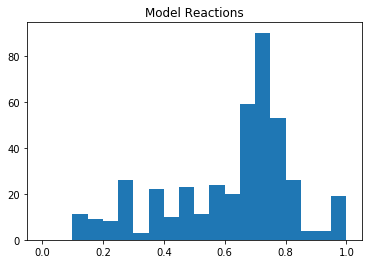

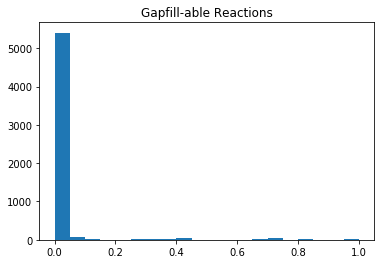

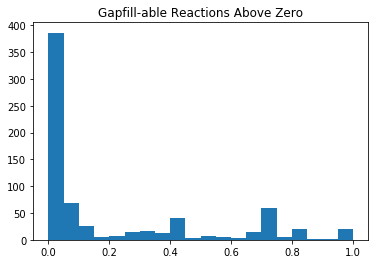

p = 1.34066e-58


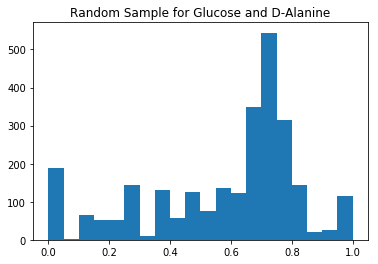

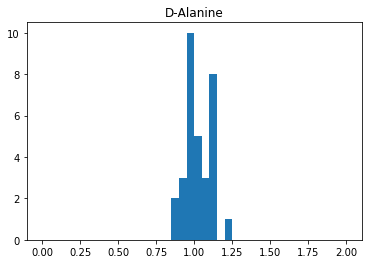

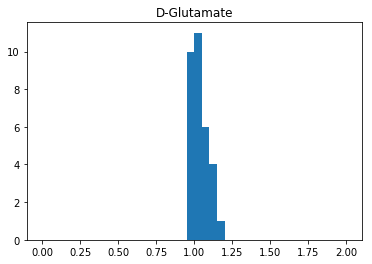

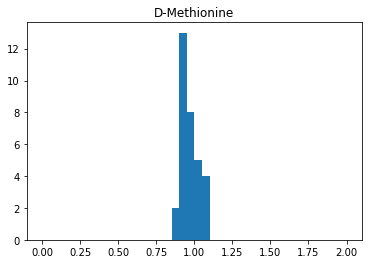

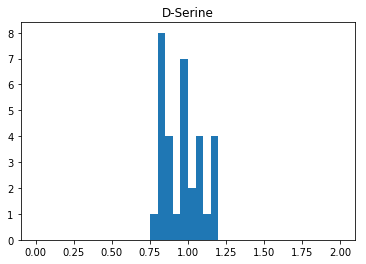

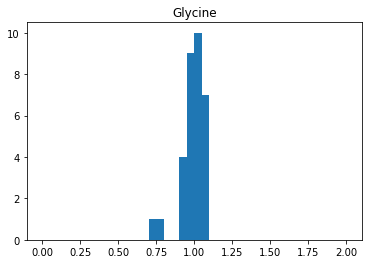

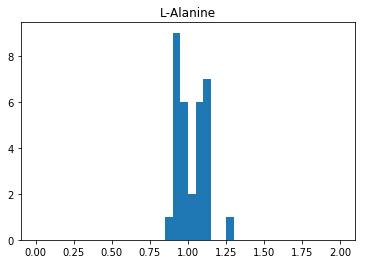

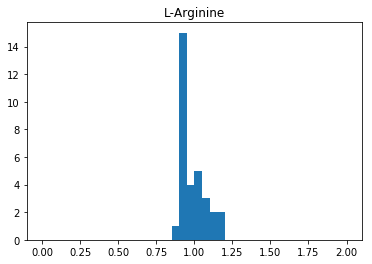

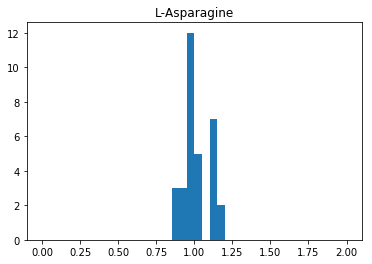

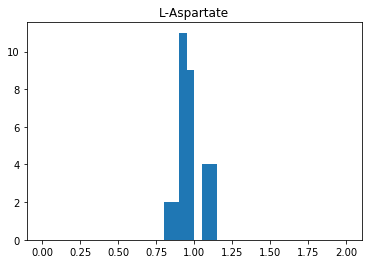

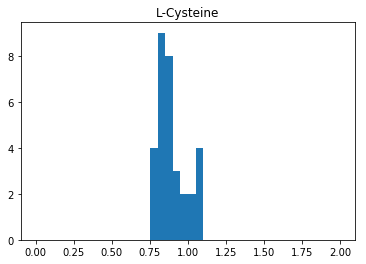

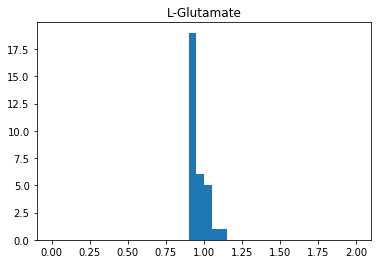

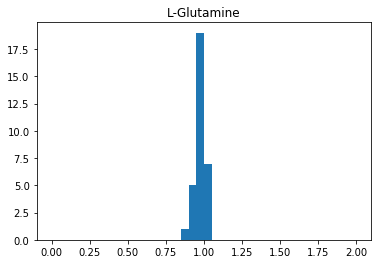

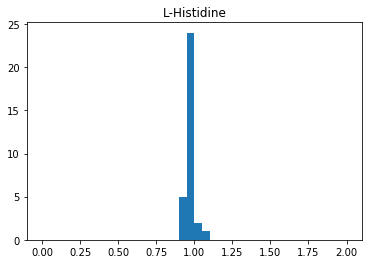

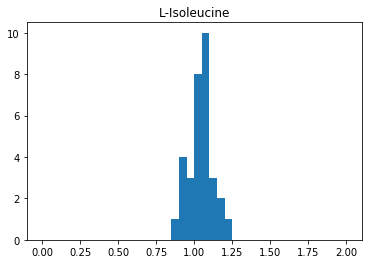

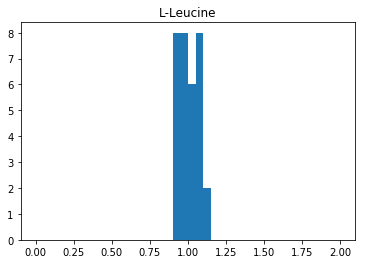

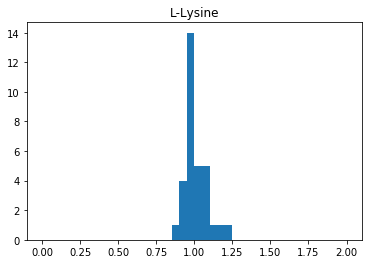

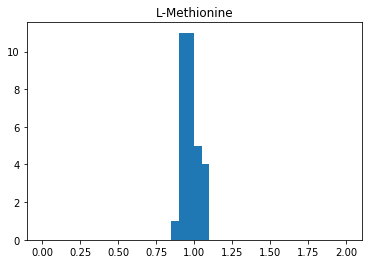

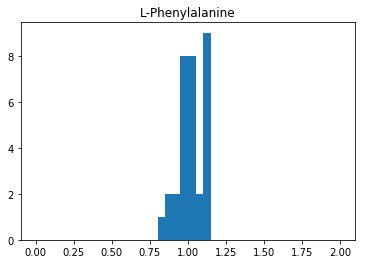

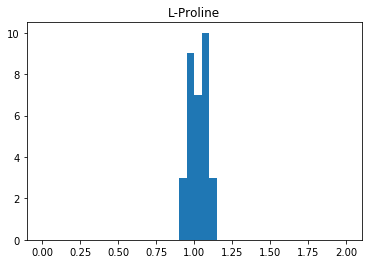

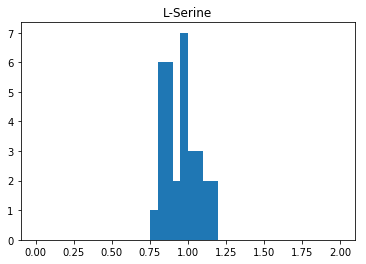

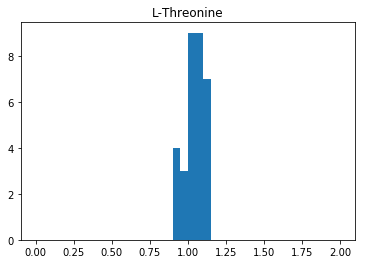

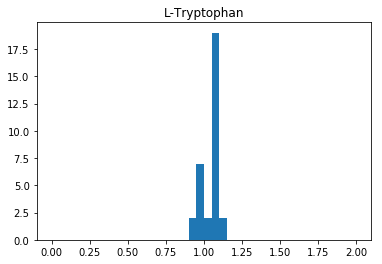

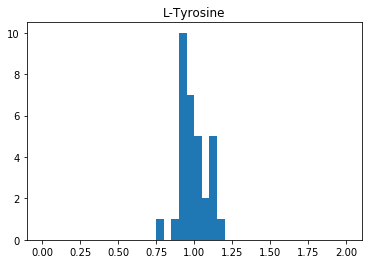

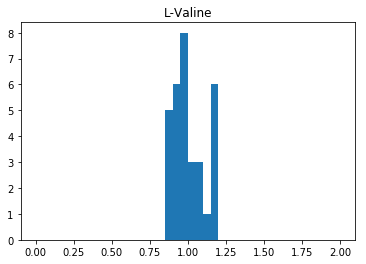

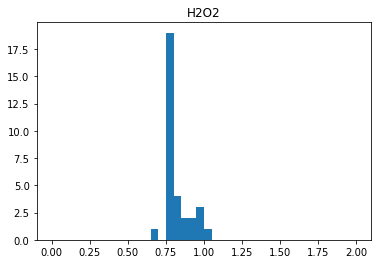

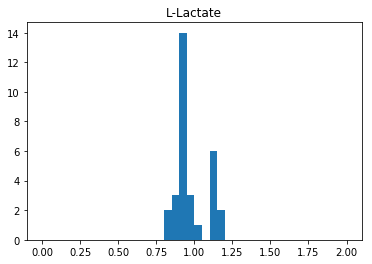

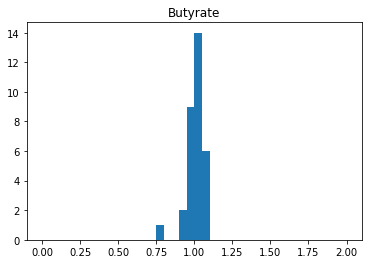

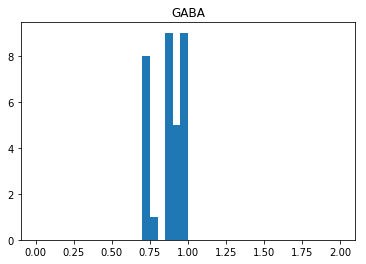

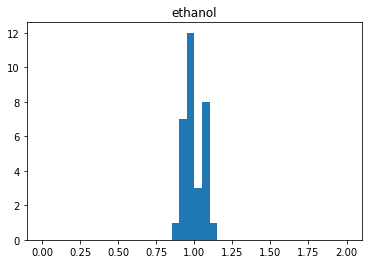

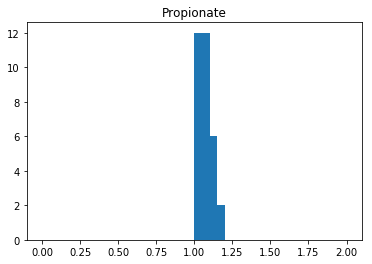

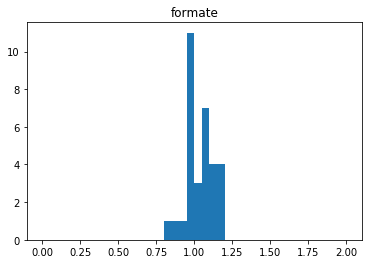

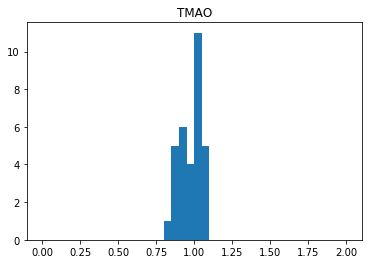

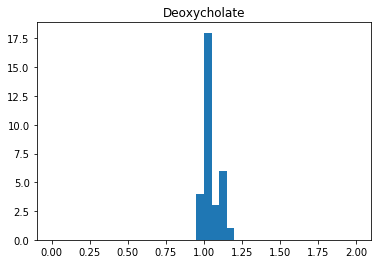

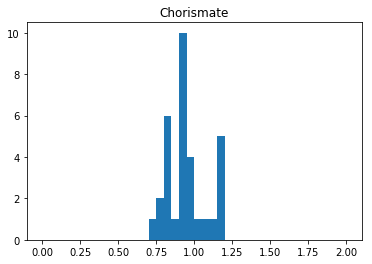

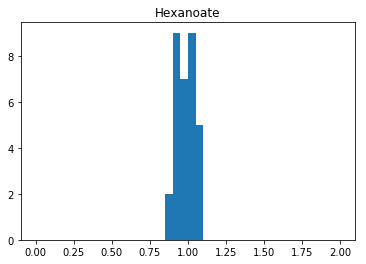

34.0seconds to complete


In [45]:
# Generate standardized 'robust' dataset
t = time.time()

ID_list = []
# Write header to file
for prod_ind in list(range(0,35)):
    ID = str(str(prod_ind))
    ID_list.append(ID)

output_file = '../Data/stand_whole_path_avg_robust_test.tsv'  

output_file = open(output_file, 'w')
header = 'genomes\t' + '\t'.join(ID_list) + '\n'
output_file.write(header)

for genome_id in genome_ids[98:99]:
    # Set up model
    model = cobra.io.read_sbml_model('../gap_models/'+ genome_id +'.xml')
    likelihoods = pickle.load(open('../likelihoods/'+ genome_id +'.probs'))
    # Ensure free diffusion of water
    model.reactions.get_by_id('rxn05319_c').name = "Water transport"
    model.reactions.get_by_id('rxn05319_c').bounds = (-1000., 1000.)
    ### Set Up Model: remove low likelihood reactions
    low_like_model = []
    for rxn in model.reactions:
        if rxn.id.startswith('rxn'):
            try:
                if likelihoods[rxn.id] <= 0.1:
                    low_like_model.append(rxn.id)
            except:
                pass
    model_rxns_to_remove = [model.reactions.get_by_id(rxn) for rxn in low_like_model]
    model.remove_reactions(model_rxns_to_remove)

    model_rxns = set([rxn.id for rxn in model.reactions])
    
    model_rxns_w_like = rxns_w_like.intersection(model_rxns)
    gapfiller_rxns_w_like = rxns_w_like.difference(model_rxns_w_like)
    
    likes = []
    for rxn in model_rxns_w_like:
        likes.append(likelihoods[str(rxn)])
    plt.hist(likes, bins=list(frange(0,1.05,0.05)), range=(0,1))  #
    plt.title("Model Reactions")
    plt.show()

    likes = []
    for rxn in gapfiller_rxns_w_like:
        likes.append(likelihoods[str(rxn)])
    plt.hist(likes, bins=list(frange(0,1.05,0.05)), range=(0,1))  #
    plt.title("Gapfill-able Reactions")
    plt.show()
    
    likes = []
    for rxn in gapfiller_rxns_w_like:
        if likelihoods[str(rxn)] > 0:
            likes.append(likelihoods[str(rxn)])
    plt.hist(likes, bins=list(frange(0,1.05,0.05)), range=(0,1))  #
    plt.title("Gapfill-able Reactions Above Zero")
    plt.show()
    
    file_name = "../metabolic_output/%s.data" % (genome_id)
    total_dataset_dict = pickle.load(open(file_name, "rb"))
    # Write row name
    output_file.write(genome_id + '\t')
    # Write whole_path_like to rows
    temp_counter = 0
    for prod_ind in list(range(0,35)): # 0,35
        robust_output =[]
        for carb_ind in list(range(0,32)): # 0,32
            ID = str(genome_id + ':' + str(carb_ind) + '.0.' + str(prod_ind))
            if ID != str(genome_id + ':16.0.25'):
                gaps = len(total_dataset_dict[ID]['gaps_w_flux'])
                path = len(total_dataset_dict[ID]['path_w_flux'])
                likes = []
                for i in list(range(0,99)):
                    for rxn in random.sample(gapfiller_rxns_w_like, gaps):
                        likes.append(likelihoods[str(rxn)])
                    for rxn in random.sample(model_rxns_w_like, path):
                        likes.append(likelihoods[str(rxn)])
                k2, p = stats.normaltest(likes)
                if temp_counter == 0:
                    print("p = {:g}".format(p))
                    plt.hist(likes, bins=list(frange(0,1.05,0.05)), range=(0,1))  #
                    plt.title("Random Sample for Glucose and D-Alanine")
                    plt.show()
                    temp_counter = -1
                stand_factor = np.mean(likes)
                stand_out = total_dataset_dict[ID]['whole_path_like']/stand_factor
                robust_output.append(round(stand_out,4))
            objective = total_dataset_dict[ID]['objective']
        robust_avg = np.median(robust_output) # Median rather than mean
        plt.hist(robust_output, bins=list(frange(0,2.05,0.05)), range=(0,1))  #
        plt.title(objective)
        plt.show()
        if prod_ind != 34:
            output_file.write(str(round(robust_avg,4))+'\t')
        elif prod_ind == 34:
            output_file.write(str(round(robust_avg,4))+'\n')
        else:
            print('ERROR')

output_file.close()

print(str(round(time.time() - t)) + 'seconds to complete')

In [21]:
stand_factor

0.4793908778162756

In [22]:
np.median(likes)

0.5804063943933363

In [23]:
total_dataset_dict[ID]['whole_path_like']

0.4621528578682888

In [41]:
genome_ids[98:99]

['220668.9']